# テスト第3回解答

* 試験時間は60分です。
* 様々な資料を参考にして解いて構いません。
* 計算にあたっては任意のプログラミング言語の使用を許可します。

## 第1問

**得点表** 合計40点, (1) 15点, (2) 15点, (3) 10点

$2$次元の入力$x_{1},x_{2}$から2値の出力ラベル$y=1\text{ or }0$を予測する問題を考えてみましょう。logistic回帰モデルは、

\begin{align*}
p(x_{1},x_{2}) &= \sigma(w_{0}+w_{1}x_{1}+w_{2}x_{2})
\end{align*}

という式によって、入力$(x_{1},x_{2})$からデータポイントが出力ラベル$y=1$に所属する確率$\mathbb{P}[y=1\mid (x_{1}.x_{2})]$を推定するモデルの一種です。ここで、$\sigma(x)$はsigmoid関数と呼ばれる関数です。以下の問いに答えてください。

(1) $\sigma(0.5)$を計算してください。

In [5]:
import numpy as np
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

sigmoid(0.5)

0.6224593312018546

(2) パラメータを$(w_{0}, w_{1}, w_{2})=(0.5, 1.0, -1.0)$に固定します。このとき、以下の4つのデータポイントに対して、ラベル$y=1$の所属確率を推定してください。

|$x_{1}$|$x_{2}$|$y$|
|:--:|:--:|:--:|
|1|1|1|
|0|1|1|
|1|0|1|
|0|0|0|

In [6]:
# 関数p(x1,x2)の実装
def pred(x, w):
    return sigmoid(w[0] + x@w[1:])

In [7]:
X = np.array([[1, 1], 
              [0, 1],
              [1, 0],
              [0, 0]])
w = np.array([0.5, 1.0, -1.0])
pred(X, w)

array([0.62245933, 0.37754067, 0.81757448, 0.62245933])

(3) logistic回帰のパラメータを決定する時は、入力$(x_{1},x_{2})$と出力$y$が共にレコードされているデータセットを一つ準備し、各データポイントに対し

\begin{align*}
l(p(x_{1},x_{2}), y) &= -y\log p(x_{1},x_{2}) -(1-y)\log(1-p(x_{1},x_{2}))
\end{align*}

を計算し、この値の標本平均が最も小さくなるようなパラメータ$(w_{0},w_{1},w_{2})$を求めます。(2)の設定のもとで、4つのデータポイントそれぞれの$l(p(x_{1},x_{2}), y)$の値を求め、その標本平均を計算してください。

In [9]:
y = np.array([1, 1, 1, 0])
cross_entropy = - y*np.log(pred(X, w)) - (1.0 - y)*np.log(1.0 - pred(X, w))
cross_entropy, cross_entropy.mean()

(array([0.47407698, 0.97407698, 0.20141328, 0.97407698]), 0.6559110576307682)

## 第2問

**得点表** 合計40点, (1) 15点, (2) 15点, (3) 10点

以下の様な、2次元の入力$(x_{1},x_{2})$と出力$y$を4点レコードしたデータセットがあります。このデータセットを用いて入力$(x_{1},x_{2})$から出力$y$を予測する式を葉の最大数が3の決定木回帰モデルで作った結果、以下のような予測式を得ました。

<center><img src="./imgs/決定木回帰.png" width=500px></center>

以下の問いに答えてください。なお、決定木回帰モデルは2乗損失$l(y,\hat{y})=(y-\hat{y})^2$,（$\hat{y}$は$y$の予測値）を用いて学習したものとします。

(1) $a,b,c$には$y$の予測値が入ります。それぞれの値を答えてください。

**解** : 各分割領域に属するデータポイントたちの$y$の値の標本平均を予測値にするので、$a=1$, $b=0$, $c=-1$になります。

(2) 入力変数$x_{1}$, $x_{2}$の変数重要度を計算してください。変数重要度の定義は、`sklearn.tree.DecisionTreeRegressor`クラスの`feature_importances_`で計算される変数重要度の定義に従うものとします。

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
X = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])
y = np.array([1.25, 0.75, 0.00, -1.00])
dtr = DecisionTreeRegressor(max_leaf_nodes = 3)
dtr.fit(X, y)
dtr.feature_importances_

array([0.81818182, 0.18181818])

(3) 2乗損失$l(y,\hat{y})$の代わりに絶対値損失$l(y,\hat{y})=|y-\hat{y}|$を用いたところ、2乗損失の場合と分割領域が同じ予測式が得られました。この場合に$y$の予測値$a,b,c$の値はいくらになるかを答え、その根拠を手短に説明してください。

**解** : 2乗損失の場合に、予測値が分割領域に属するデータポイントの標本平均になるのは、平均2乗損失を最小化するためにはそうなる必要があったからでした。同様のことを絶対値損失の場合に考えると、予測値は分割領域に属するデータポイントの中央値になることがわかります。したがって、$a=1$, $b=0$, $c=-1$になります。（今回の場合は偶然、2乗損失の場合と結果が変りません。採点にあたっては根拠が正しくない限りは点数を与えないものとします。）

## 第3問

**得点表** 合計20点, (1) 10点, (2) 10点

(1) 次のようなデータを多項式カーネルのサポートベクトル分類モデルで学習させ、1次元の入力$x$から出力ラベル$y$を予測できるようにします。学習した結果、与えられたデータに対する予測の正答率（訓練データの正答率）が$1.0$になるような多項式カーネルの次数の最小値を答えてください。なお、逆正則化ハイパーパラメータは適当に選択して良いものとします。

|$x$|$y$|
|:--:|:--:|
|-2|-1|
|-1|+1|
|0|-1|
|1|+1|
|2|-1|

ここで多項式カーネルとは、ある正の整数$d$によって$K(x,x')=(1+xx')^d$と定義されるものとし、特に$d$を多項式カーネルの次数と呼んでいるものとします。

**解** : 正解は4次の多項式カーネル。$x$の4次式を判別関数として実現すれば出力$y$を予測できるため。以下の様に、4次の多項式カーネルの正答率が$1.0$になることは、`sklearn` packageを用いて確認することもできます。

In [6]:
import numpy as np
from sklearn.svm import SVC
X = np.array([[2.0], [1.0], [0.0], [-1.0], [-2.0]])
y = np.array([0, 1, 0, 1, 0])
svc = SVC(C = 10.0, kernel = "poly", coef0 = 1.0, degree = 4)
svc.fit(X, y)
svc.score(X, y)

1.0

(2) `sklearn.datasets`モジュールの`make_moons`メソッドを用いてmoonsデータセットを生成しました。特に、

* `n_samples = 100`
* `noise = 0.15`

と設定しました。このデータセットに対して2次元の入力$X$から出力ラベル$y$を予測する式を得るべく、RBFカーネルのサポートベクトル分類器を学習させました。以下の4つのグラフは、以下に掲げる4通りの逆正則化ハイパーパラメータ`C`, 動径`gamma`の組み合わせについて、横軸を入力変数の0列目, 縦軸を入力変数の1列目に取り、学習済みモデルがラベルを`1`と予測した部分には黄緑色を、`0`と予測した部分には紫色を塗ったものです。

|`C`|`gamma`|
|:--:|:--:|
|1000.0|5.0|
|1000.0|0.1|
|0.001|5.0|
|0.001|0.1|

`C=0.001`, `gamma=0.1`に対応するグラフは何番かを答えてください。

<center><img src="./imgs/サポートベクトル分類.png" width=400px></center>

**解** : `C`と`gamma`の値が小さくなると決定境界は線形に近づくことが知られています。これは`sklearn`を用いて実際に実験してみることでも確認できます。要するにグラフ1が`C=0.001`, `gamma=0.1`に対応するグラフです。

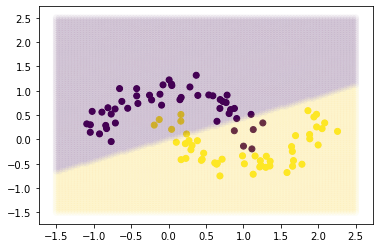

In [8]:
# 実験
# 必要なモジュールの読み込み
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 学習
X_train, y_train = make_moons(n_samples = 100, noise = 0.15)
svc = Pipeline([("scaler", StandardScaler()),
                ("learner", SVC(kernel = "rbf", C = 0.001, gamma = 0.1))])
svc.fit(X_train, y_train)

# 可視化
x0 = np.linspace(start = -1.5, stop = 2.5, num = 100)
x1 = np.linspace(start = -1.5, stop = 2.5, num = 100)
xx0, xx1 = np.meshgrid(x0, x1)
X_test = np.c_[xx0.ravel(), xx1.ravel()]
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = svc.predict(X_test), alpha = 0.03)
plt.show()